In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
ms_df=pd.read_csv('Microsoft_Data.csv')
y=ms_df['HasDetections']

ms_df.drop(columns=['HasDetections','MachineIdentifier'],inplace=True)

mainfo_df=pd.DataFrame({'col_name':ms_df.columns,'na_cnt':ms_df.isnull().sum(),'pc_cnt':(ms_df.isnull().sum()/ms_df.shape[0])*100})


col_gt50_ls=list(mainfo_df[mainfo_df['pc_cnt']>50]['col_name'])

ms_df.drop(columns=col_gt50_ls,inplace=True)

x_train,x_test,y_train,y_test=train_test_split(ms_df,y,random_state=99,test_size=0.2)

con_cols=[col for col in ms_df.columns if ms_df[col].dtype=='int64' or ms_df[col].dtype=='float64']
cat_cols=[col for col in ms_df.columns if ms_df[col].dtype=='object']

In [3]:
for col in con_cols:
    x_train[col].fillna(x_train[col].mean(),inplace=True)
    x_test[col].fillna(x_train[col].mean(),inplace=True)
    
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0],inplace=True)
    x_test[col].fillna(x_train[col].mode()[0],inplace=True)

In [4]:
scaler=StandardScaler()

for col in con_cols:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))

In [6]:
cat_encd_train=pd.get_dummies(x_train[cat_cols])
cat_encd_test=pd.get_dummies(x_test[cat_cols])

In [7]:
cat_encd_train_final,cat_encd_test_final=cat_encd_train.align(cat_encd_test,join='inner',axis=1)
cat_encd_test_final###aligning train & test data one hot encoded catg columns due to unqual no of columns i.e no of cilumns would differ for that we align to get same

,ProductName_mse,ProductName_win8defender,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13407.0,EngineVersion_1.1.13504.0,EngineVersion_1.1.13601.0,...,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
237,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
38093,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22505,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48014,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46283,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26397,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27816,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41934,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
x_train_final=pd.concat([x_train[con_cols],cat_encd_train_final],axis=1)


In [9]:
x_test_final=pd.concat([x_test[con_cols],cat_encd_test_final],axis=1)

In [10]:
logreg=LogisticRegression()
logreg.fit(x_train_final,y_train)

LogisticRegression()

In [10]:
y_test_pred=logreg.predict(x_test_final)

In [11]:
confusion_matrix(y_test,y_test_pred)
#precision_score(y_test,y_test_pred)

array([[3605, 2064],
       [2162, 3521]], dtype=int64)

In [12]:
recall_score(y_test,y_test_pred)

0.6195671300369523

In [13]:
f1_score(y_test,y_test_pred)

0.6249556265530707

Text(0.5, 1.0, 'AUC Curve')

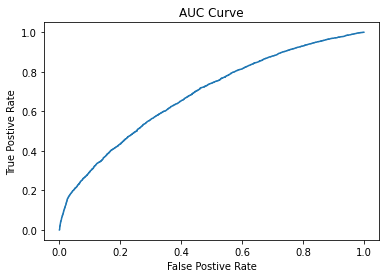

In [14]:
pos_probs=logreg.predict_proba(x_test_final)[::,1]
fpr,tpr,thresold=roc_curve(y_test,pos_probs)
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC Curve')


In [15]:
roc_auc_score(y_test,pos_probs)

0.6840699921503997

In [16]:
dtree=DecisionTreeClassifier()## Max_depth,min_samples_split,..e.tc all these are Hyperparameters
#can be found using Hyperparamter tuning 
dtree.fit(x_train_final,y_train)

DecisionTreeClassifier()

In [17]:
dtree_test_pred=dtree.predict(x_test_final)

In [18]:
confusion_matrix(y_test,dtree_test_pred)

array([[3163, 2506],
       [2422, 3261]], dtype=int64)

In [19]:
precision_score(y_test,dtree_test_pred)

0.5654586440090168

In [20]:
recall_score(y_test,dtree_test_pred)

0.5738166461376034

In [21]:
f1_score(y_test,dtree_test_pred)

0.5696069868995634

In [22]:
dtree_pos_probs=dtree.predict_proba(x_test_final)[::,1]
dtree_pos_probs

array([1., 1., 1., ..., 1., 0., 0.])

In [23]:
dtree_fpr,dtree_tpr,dtree_thresold=roc_curve(y_test,dtree_pos_probs)
dtree_fpr

array([0.        , 0.44205327, 1.        ])

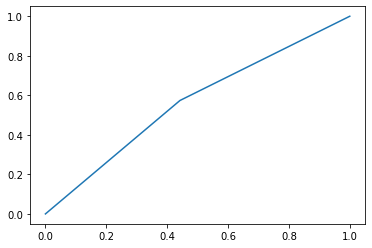

In [24]:
plt.plot(dtree_fpr,dtree_tpr)

In [25]:
roc_auc_score(y_test,dtree_pos_probs)

0.5658816869777803

In [26]:
rdfc=RandomForestClassifier(n_estimators=50,max_depth=10)
rdfc.fit(x_train_final,y_train)
rdfc_test_pred=rdfc.predict(x_test_final)

In [27]:
f1_score(y_test,rdfc_test_pred)

0.6404447064768802

In [28]:
adbc=AdaBoostClassifier(n_estimators=50,learning_rate=1.5)
adbc.fit(x_train_final,y_train)
adbc_test_pred=adbc.predict(x_test_final)

In [29]:
f1_score(y_test,adbc_test_pred)

0.6330219156552868

In [30]:
# GridSearch CV technique
dt=DecisionTreeClassifier()

dt_dict ={ 
        'max_depth':[5,6,7,8],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[4,45,6,7] 
         }

gd=GridSearchCV(dt,dt_dict,cv=5,verbose=22)


In [31]:
gd.fit(x_train_final,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START max_depth=5, min_samples_leaf=4, min_samples_split=1.......
[CV 1/5; 1/64] END max_depth=5, min_samples_leaf=4, min_samples_split=1; total time=   1.2s
[CV 2/5; 1/64] START max_depth=5, min_samples_leaf=4, min_samples_split=1.......
[CV 2/5; 1/64] END max_depth=5, min_samples_leaf=4, min_samples_split=1; total time=   1.2s
[CV 3/5; 1/64] START max_depth=5, min_samples_leaf=4, min_samples_split=1.......
[CV 3/5; 1/64] END max_depth=5, min_samples_leaf=4, min_samples_split=1; total time=   1.2s
[CV 4/5; 1/64] START max_depth=5, min_samples_leaf=4, min_samples_split=1.......
[CV 4/5; 1/64] END max_depth=5, min_samples_leaf=4, min_samples_split=1; total time=   1.3s
[CV 5/5; 1/64] START max_depth=5, min_samples_leaf=4, min_samples_split=1.......
[CV 5/5; 1/64] END max_depth=5, min_samples_leaf=4, min_samples_split=1; total time=   1.2s
[CV 1/5; 2/64] START max_depth=5, min_samples_leaf=4, min_samples_split=2

[CV 3/5; 10/64] END max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   4.1s
[CV 4/5; 10/64] START max_depth=5, min_samples_leaf=6, min_samples_split=2......
[CV 4/5; 10/64] END max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   3.9s
[CV 5/5; 10/64] START max_depth=5, min_samples_leaf=6, min_samples_split=2......
[CV 5/5; 10/64] END max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   4.0s
[CV 1/5; 11/64] START max_depth=5, min_samples_leaf=6, min_samples_split=3......
[CV 1/5; 11/64] END max_depth=5, min_samples_leaf=6, min_samples_split=3; total time=   4.0s
[CV 2/5; 11/64] START max_depth=5, min_samples_leaf=6, min_samples_split=3......
[CV 2/5; 11/64] END max_depth=5, min_samples_leaf=6, min_samples_split=3; total time=   4.0s
[CV 3/5; 11/64] START max_depth=5, min_samples_leaf=6, min_samples_split=3......
[CV 3/5; 11/64] END max_depth=5, min_samples_leaf=6, min_samples_split=3; total time=   4.0s
[CV 4/5; 11/64] START max_depth=5, mi

[CV 1/5; 20/64] END max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   4.8s
[CV 2/5; 20/64] START max_depth=6, min_samples_leaf=4, min_samples_split=4......
[CV 2/5; 20/64] END max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   4.8s
[CV 3/5; 20/64] START max_depth=6, min_samples_leaf=4, min_samples_split=4......
[CV 3/5; 20/64] END max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   4.9s
[CV 4/5; 20/64] START max_depth=6, min_samples_leaf=4, min_samples_split=4......
[CV 4/5; 20/64] END max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   4.7s
[CV 5/5; 20/64] START max_depth=6, min_samples_leaf=4, min_samples_split=4......
[CV 5/5; 20/64] END max_depth=6, min_samples_leaf=4, min_samples_split=4; total time=   4.7s
[CV 1/5; 21/64] START max_depth=6, min_samples_leaf=45, min_samples_split=1.....
[CV 1/5; 21/64] END max_depth=6, min_samples_leaf=45, min_samples_split=1; total time=   1.2s
[CV 2/5; 21/64] START max_depth=6, m

[CV 3/5; 29/64] END max_depth=6, min_samples_leaf=7, min_samples_split=1; total time=   1.1s
[CV 4/5; 29/64] START max_depth=6, min_samples_leaf=7, min_samples_split=1......
[CV 4/5; 29/64] END max_depth=6, min_samples_leaf=7, min_samples_split=1; total time=   1.1s
[CV 5/5; 29/64] START max_depth=6, min_samples_leaf=7, min_samples_split=1......
[CV 5/5; 29/64] END max_depth=6, min_samples_leaf=7, min_samples_split=1; total time=   1.1s
[CV 1/5; 30/64] START max_depth=6, min_samples_leaf=7, min_samples_split=2......
[CV 1/5; 30/64] END max_depth=6, min_samples_leaf=7, min_samples_split=2; total time=   4.3s
[CV 2/5; 30/64] START max_depth=6, min_samples_leaf=7, min_samples_split=2......
[CV 2/5; 30/64] END max_depth=6, min_samples_leaf=7, min_samples_split=2; total time=   4.4s
[CV 3/5; 30/64] START max_depth=6, min_samples_leaf=7, min_samples_split=2......
[CV 3/5; 30/64] END max_depth=6, min_samples_leaf=7, min_samples_split=2; total time=   4.4s
[CV 4/5; 30/64] START max_depth=6, mi

[CV 1/5; 39/64] END max_depth=7, min_samples_leaf=45, min_samples_split=3; total time=   4.8s
[CV 2/5; 39/64] START max_depth=7, min_samples_leaf=45, min_samples_split=3.....
[CV 2/5; 39/64] END max_depth=7, min_samples_leaf=45, min_samples_split=3; total time=   5.1s
[CV 3/5; 39/64] START max_depth=7, min_samples_leaf=45, min_samples_split=3.....
[CV 3/5; 39/64] END max_depth=7, min_samples_leaf=45, min_samples_split=3; total time=   5.0s
[CV 4/5; 39/64] START max_depth=7, min_samples_leaf=45, min_samples_split=3.....
[CV 4/5; 39/64] END max_depth=7, min_samples_leaf=45, min_samples_split=3; total time=   5.0s
[CV 5/5; 39/64] START max_depth=7, min_samples_leaf=45, min_samples_split=3.....
[CV 5/5; 39/64] END max_depth=7, min_samples_leaf=45, min_samples_split=3; total time=   4.9s
[CV 1/5; 40/64] START max_depth=7, min_samples_leaf=45, min_samples_split=4.....
[CV 1/5; 40/64] END max_depth=7, min_samples_leaf=45, min_samples_split=4; total time=   4.8s
[CV 2/5; 40/64] START max_depth

[CV 4/5; 48/64] END max_depth=7, min_samples_leaf=7, min_samples_split=4; total time=   4.9s
[CV 5/5; 48/64] START max_depth=7, min_samples_leaf=7, min_samples_split=4......
[CV 5/5; 48/64] END max_depth=7, min_samples_leaf=7, min_samples_split=4; total time=   5.4s
[CV 1/5; 49/64] START max_depth=8, min_samples_leaf=4, min_samples_split=1......
[CV 1/5; 49/64] END max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   1.6s
[CV 2/5; 49/64] START max_depth=8, min_samples_leaf=4, min_samples_split=1......
[CV 2/5; 49/64] END max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   1.2s
[CV 3/5; 49/64] START max_depth=8, min_samples_leaf=4, min_samples_split=1......
[CV 3/5; 49/64] END max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   1.1s
[CV 4/5; 49/64] START max_depth=8, min_samples_leaf=4, min_samples_split=1......
[CV 4/5; 49/64] END max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   1.3s
[CV 5/5; 49/64] START max_depth=8, mi

[CV 1/5; 58/64] END max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   6.0s
[CV 2/5; 58/64] START max_depth=8, min_samples_leaf=6, min_samples_split=2......
[CV 2/5; 58/64] END max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   6.2s
[CV 3/5; 58/64] START max_depth=8, min_samples_leaf=6, min_samples_split=2......
[CV 3/5; 58/64] END max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   5.8s
[CV 4/5; 58/64] START max_depth=8, min_samples_leaf=6, min_samples_split=2......
[CV 4/5; 58/64] END max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   5.6s
[CV 5/5; 58/64] START max_depth=8, min_samples_leaf=6, min_samples_split=2......
[CV 5/5; 58/64] END max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   5.5s
[CV 1/5; 59/64] START max_depth=8, min_samples_leaf=6, min_samples_split=3......
[CV 1/5; 59/64] END max_depth=8, min_samples_leaf=6, min_samples_split=3; total time=   5.3s
[CV 2/5; 59/64] START max_depth=8, mi

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [4, 45, 6, 7],
                         'min_samples_split': [1, 2, 3, 4]},
             verbose=22)

In [32]:
gd.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [33]:
gv_test_pred=gd.predict(x_test_final)

In [34]:
confusion_matrix(y_test,gv_test_pred)
#precision_score(y_test,y_test_pred)

array([[3124, 2545],
       [1899, 3784]], dtype=int64)

In [35]:
precision_score(y_test,gv_test_pred)

0.597882761889714

In [36]:
f1_score(y_test,gv_test_pred)

0.63003663003663

In [37]:
rdcv=RandomizedSearchCV(dt,dt_dict,cv=5,n_iter=15)

In [38]:
rdcv.fit(x_train_final,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'max_depth': [5, 6, 7, 8],
                                        'min_samples_leaf': [4, 45, 6, 7],
                                        'min_samples_split': [1, 2, 3, 4]})

In [39]:
rdcv_test_pred=rdcv.predict(x_test_final)

In [40]:
confusion_matrix(y_test,rdcv_test_pred)

array([[3124, 2545],
       [1902, 3781]], dtype=int64)

In [41]:
precision_score(y_test,rdcv_test_pred)

0.5976920644957319

In [42]:
f1_score(y_test,rdcv_test_pred)

0.6296943958697644

In [11]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train_final,y_train)

GradientBoostingClassifier()

In [12]:
gbc_test_pred=gbc.predict(x_test_final)

In [13]:
confusion_matrix(y_test,gbc_test_pred)

array([[3585, 2084],
       [2074, 3609]], dtype=int64)

In [14]:
precision_score(y_test,gbc_test_pred)

0.6339364131389426

In [15]:
f1_score(y_test,gbc_test_pred)

0.6344936708860759

In [ ]:
sv=SVC()
sv.fit(x_train_final,y_train)

In [ ]:
sv_test_pred=sv.predict(x_test_final)

In [ ]:
confusion_matrix(y_test,sv_test_pred)